Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Finished Downloading!
starting training for label 0
Pretraining. Generating images for label 0
Pretraining. Generating images for label 0
Pretraining. Generating images for label 0
Pretraining. Generating images for label 0
Pretraining. Generating images for label 0
Pretraining. Generating images for label 0
Pretraining. Generating images for label 0
Pretraining. Generating images for label 0
Pretraining. Generating images for label 0
Pretraining. Generating images for label 0
Iteration 4000. G_loss 2.8428444862365723. D_loss 0.5134157538414001
Iteration 4100. G_loss 2.9339513778686523. D_loss 0.5563892126083374
Iteration 4200. G_loss 1.966720461845398. D_loss 1.7525829076766968
Iteration 4300. G_loss 4.249795436859131. D_loss 0.27473318576812744
Iteration 4400. G_loss 2.9513537883758545. D_loss

Iteration 4000. G_loss 8.550925254821777. D_loss 0.0013461478520184755
Iteration 4100. G_loss 7.480990409851074. D_loss 0.0010601007379591465
Iteration 4200. G_loss 8.220484733581543. D_loss 0.007274779956787825
Iteration 4300. G_loss 6.321098804473877. D_loss 0.009988592937588692
Iteration 4400. G_loss 4.996644973754883. D_loss 0.011974642053246498
Iteration 4500. G_loss 7.640294075012207. D_loss 0.0017592397052794695
Iteration 4600. G_loss 7.554096698760986. D_loss 0.0005834251060150564
Iteration 4700. G_loss 5.471369743347168. D_loss 0.008867545984685421
Iteration 4800. G_loss 4.773042678833008. D_loss 0.02011105790734291
Iteration 4900. G_loss 6.1148576736450195. D_loss 0.0035893016029149294
Iteration 5000. G_loss 8.276751518249512. D_loss 0.0005651027895510197
Iteration 5100. G_loss 6.368892669677734. D_loss 0.0018152556149289012
Iteration 5200. G_loss 6.6360087394714355. D_loss 0.011648780666291714
Iteration 5300. G_loss 8.50613784790039. D_loss 0.0016389407683163881
Iteration 54

Iteration 4800. G_loss 5.633768081665039. D_loss 0.1488787829875946
Iteration 4900. G_loss 3.8487398624420166. D_loss 0.10808546841144562
Iteration 5000. G_loss 2.1483707427978516. D_loss 0.4477398693561554
Iteration 5100. G_loss 3.346001386642456. D_loss 0.4214607775211334
Iteration 5200. G_loss 2.8202712535858154. D_loss 0.6246194243431091
Iteration 5300. G_loss 1.6003973484039307. D_loss 0.9692613482475281
Iteration 5400. G_loss 1.6731514930725098. D_loss 0.45794323086738586
Iteration 5500. G_loss 2.441239356994629. D_loss 0.8312642574310303
Iteration 5600. G_loss 1.9795794486999512. D_loss 1.0345816612243652
Iteration 5700. G_loss 2.943171977996826. D_loss 0.29302945733070374
Iteration 5800. G_loss 1.6442360877990723. D_loss 0.6971836090087891
Iteration 5900. G_loss 3.0674219131469727. D_loss 0.6405898332595825
Iteration 6000. G_loss 3.09423828125. D_loss 0.9314014911651611
Iteration 6100. G_loss 2.515554904937744. D_loss 0.6401236653327942
Iteration 6200. G_loss 1.6269820928573608

Iteration 5700. G_loss 7.766274452209473. D_loss 0.0015256399055942893
Iteration 5800. G_loss 7.450286865234375. D_loss 0.10879313200712204
Iteration 5900. G_loss 6.400068759918213. D_loss 0.006541799753904343
Iteration 6000. G_loss 6.356888294219971. D_loss 0.004077949561178684
Iteration 6100. G_loss 5.884937763214111. D_loss 0.0015936307609081268
Iteration 6200. G_loss 15.45498275756836. D_loss 0.0001289268839173019
Iteration 6300. G_loss 9.102849960327148. D_loss 0.10484933108091354
Iteration 6400. G_loss 4.3326029777526855. D_loss 0.04824090003967285
Iteration 6500. G_loss 5.32453727722168. D_loss 0.024227267131209373
Iteration 6600. G_loss 6.141224384307861. D_loss 0.007599901407957077
Iteration 6700. G_loss 13.795912742614746. D_loss 0.09011617302894592
Iteration 6800. G_loss 4.603975296020508. D_loss 0.036587994545698166
Iteration 6900. G_loss 2.936408042907715. D_loss 0.22617357969284058


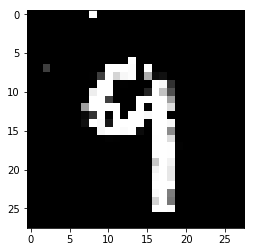

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.examples.tutorials.mnist import input_data


#downloading model
print("Downloading Data Set!")
mnist = input_data.read_data_sets("MNIST_data/")
mnist_images = mnist.train.images
mnist_labels = mnist.train.labels
print("Finished Downloading!")

#define next batch function
r=0
def next_batch(data,size):
    global r
    if r*size+size > len(data):
        r=0
    x_train_batch = data[size*r:r*size+size,:]
    r = r+1
    return x_train_batch

#definen init weights
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape,stddev=0.1))


#define bias init
def init_bias(shape):
    return tf.Variable(tf.constant(0.2,shape=shape))


#Define class Generator and its method and init function
class Generator:
    def __init__(self):
        with tf.variable_scope('g'):
            self.gW1 = init_weights([100,256])
            self.gb1 = init_bias([256])
            self.gW2 = init_weights([256,784])
            self.gb2 = init_bias([784])
            
    def forward(self,z,training=True):
        fc1 = tf.matmul(z,self.gW1) + self.gb1
        fc1 = tf.layers.batch_normalization(fc1,training=training)
        fc1 = tf.nn.leaky_relu(fc1)
        fc2 = tf.nn.sigmoid(tf.matmul(fc1,self.gW2) + self.gb2)
        
        return fc2
    
#Define class Diccriminator and its method and init function
class Discriminator:
    def __init__(self):
        with tf.variable_scope('d'):
            self.dW1 = init_weights([5,5,1,16])
            self.db1 = init_bias([16])
            self.dW2 = init_weights([3,3,16,32])
            self.db2 = init_bias([32])
            
            self.W3 = init_weights([1568,128])
            self.b3 = init_bias([128])
            self.W4 = init_weights([128,1])
            self.b4 = init_bias([1])
            
    def forward(self,X):
        self.X = tf.reshape(X, shape=[-1,28,28,1])
        conv1 = tf.nn.leaky_relu(tf.nn.conv2d(self.X, self.dW1, strides=[1,2,2,1], padding='SAME') + self.db1)
        conv1 = tf.layers.batch_normalization(conv1,True)
        conv2 = tf.nn.leaky_relu(tf.nn.conv2d(conv1,self.dW2, strides=[1,2,2,1],padding='SAME')+self.db2)
        conv2 = tf.layers.batch_normalization(conv2,True)
        conv2 = tf.reshape(conv2,shape=[-1,7*7*32])
        
        fc1 = tf.nn.leaky_relu(tf.matmul(conv2,self.W3)  + self.b3)
        logits = tf.matmul(fc1,self.W4) + self.b4
        fc2 = tf.nn.sigmoid(logits)
        
        return fc2,logits
    
def cost(logits, labels):
    retu n tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=labels))

d = Discriminator()
g = Generator()

phX = tf.placeholder(tf.float32, [None,784])
phZ = tf.placeholder(tf.float32, [None, 100])

G_out = g.forward(phZ)
G_out_sample = g.forward(phZ,False)

D_out_real, D_logits_real = d.forward(phX)
D_out_fake, D_logits_fake = d.forward(G_out)

D_real_loss = cost(D_logits_real, tf.ones_like(D_logits_real))
D_fake_loss = cost(D_logits_fake, tf.zeros_like(D_logits_fake))

D_loss = D_real_loss + D_fake_loss
G_loss = cost(D_logits_fake , tf.ones_like(D_logits_fake))



lr = 0.001

epochs = 7000

pretrain_epochs = 4000
batch_size = 50


train_vars = tf.trainable_variables()

dvars = [var for var in train_vars if 'd' in var.name]
gvars = [var for var in train_vars if 'g' in var.name]

D_train = tf.train.AdamOptimizer(lr).minimize(D_loss, var_list = dvars)
G_train = tf.train.AdamOptimizer(lr).minimize(G_loss, var_list = gvars)

init = tf.global_variables_initializer()

if not os.path.exists('generated_images/'):
    os.makedirs('generated_images/')
    
# start 
with tf.Session() as sess:
    for i in range(10):
        sess.run(init)
        
        k = 0
        l = 10
        data = mnist_images[mnist_labels == i]
        
        print(f"starting training for label {i}")
        
        g_cost = []
        d_cost = []
        
        for j in range(epochs):
            
            batch_X = next_batch(data, batch_size)
            
            batch_z = np.random.randn(batch_size,100)


            _,d_loss = sess.run([D_train,D_loss], feed_dict = {phX:batch_X, phZ:batch_z})
            _,g_loss = sess.run([G_train,G_loss], feed_dict = {phZ:batch_z})
            
            d_cost.append(d_loss)
            g_cost.append(g_loss)
            
            if j % pretrain_epochs//10 == 0 and j<pretrain_epochs:
                print(f"Pretraining. Generating images for label {i}")
                l = l-1
                
            if j % 100 == 0 and j>=pretrain_epochs:
                sample_z = np.random.randn(1,100)
                
                gen_sample = sess.run(G_out_sample,feed_dict = {phZ:sample_z})
                
                print(f"Iteration {j}. G_loss {g_loss}. D_loss {d_loss}")
                
                #save
                image = plt.imshow(gen_sample.reshape(28,28),cmap="Greys_r")
                plt.savefig(f"generated_images/Sample{i}_{k+1}.png")
                k += 1



            
    